<a href="https://colab.research.google.com/github/NikosKats/ColabFiles/blob/CIFAR10-CNN.ipynb/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code below is an example of training a convolutional neural network (CNN) on the CIFAR-10 dataset using PyTorch. The CIFAR-10 dataset is loaded and preprocessed using the torchvision library, and the model is defined as a custom class which inherits from PyTorch's nn.Module. The model consists of 2 convolutional layers, a max pooling layer, and a fully connected layer. The code then defines a loss function (CrossEntropyLoss) and an optimizer (Adam), and trains the model for a specified number of epochs. Finally, the code tests the model's performance on the test dataset by computing the accuracy of the model's predictions. The output of this model shows an accuracy of 71.3% on the test dataset.

We will first train the model in the original CIFAR-10 dataset without making any changes to the dataset. Below the code is implemented and explained step by step through the process.

First, you will need to import the necessary libraries and set some parameters for the training process:


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

batch_size = 128
num_epochs = 10
learning_rate = 0.001
train_acc = []
test_acc = []



Next, you will need to load the CIFAR-10 dataset and apply any necessary preprocessing:



In [ ]:
# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='path/to/data', train=True,
                                        download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='path/to/data', train=False,
                                       download=True, transform=transforms.ToTensor())

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


Then you will need to define your model, in this case a convolutional neural network:

This is a simple convolutional neural network (CNN) model for the CIFAR-10 dataset. The model is defined in the CIFAR10Model class, which inherits the properties and methods of the nn.Module class from the PyTorch library's torch.nn module.

The __init__ method of the CIFAR10Model class defines the architecture of the model. The model has 3 layers:

The first layer is a 2D convolutional layer (nn.Conv2d) with 3 input channels, 64 output channels, a kernel size of 3, a stride of 1, and padding of 1. This layer is assigned to the conv1 attribute of the class.
The second layer is a 2D max pooling layer (nn.MaxPool2d) with a kernel size of 2 and a stride of 2. This layer is assigned to the pool attribute of the class.
The third layer is a 2D convolutional layer (nn.Conv2d) with 64 input channels, 128 output channels, a kernel size of 3, a stride of 1, and padding of 1. This layer is assigned to the conv2 attribute of the class.
The fourth layer is a fully connected linear layer (nn.Linear) with 12888 input units and 10 output units. This layer is assigned to the fc1 attribute of the class.
The forward method defines the forward pass of the model. It takes an input tensor x and applies the layers in the following order:

The conv1 layer with ReLU activation function.
The pool layer.
The conv2 layer with ReLU activation function.
The x tensor is reshaped to have 12888 input units.
The fc1 layer
The final output of the forward pass is returned.
An instance of the model can be created by calling the class with model = CIFAR10Model()

In [ ]:
import torch.nn as nn

# Define the model
class CIFAR10Model(nn.Module):
    def __init__(self):
        super(CIFAR10Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 8 * 8, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.fc1(x)
        return x

# Create an instance of the model
model = CIFAR10Model()


After creating an instance of the model, it can be trained and fine-tuned using a dataset, such as the CIFAR-10 dataset. This can be done by defining a loss function, optimizer, and using the built-in PyTorch functions for training and evaluation.

It's worth noting that this model is quite simple and may not achieve state-of-the-art results on the CIFAR-10 dataset. However, it can serve as a starting point for building more complex models or experimenting with different architectures. Additionally, this model could be used as a pre-trained model, which could be fine-tuned on a different dataset.

Also, this network architecture is not very deep and it does not have any batch normalization or dropout layer which are commonly used in deep learning to improve the model's performance and reduce overfitting.

This is a simple CNN model for the CIFAR-10 dataset, composed of three layers: two convolutional layers and one fully connected layer. It has a simple architecture and can serve as a starting point for building more complex models.

Then you will need to define a loss function and an optimizer:

In [ ]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


Now you can train your model:

Epoch [1/10], Loss: 0.6823, Train Accuracy: 79.84%, Test Accuracy: 71.35%
Epoch [2/10], Loss: 0.6084, Train Accuracy: 81.96%, Test Accuracy: 71.97%
Epoch [3/10], Loss: 0.5719, Train Accuracy: 81.91%, Test Accuracy: 71.54%
Epoch [4/10], Loss: 0.4918, Train Accuracy: 83.79%, Test Accuracy: 71.88%
Epoch [5/10], Loss: 0.5096, Train Accuracy: 84.46%, Test Accuracy: 72.01%
Epoch [6/10], Loss: 0.4685, Train Accuracy: 84.62%, Test Accuracy: 71.59%
Epoch [7/10], Loss: 0.5421, Train Accuracy: 85.26%, Test Accuracy: 71.98%
Epoch [8/10], Loss: 0.4170, Train Accuracy: 86.27%, Test Accuracy: 71.69%
Epoch [9/10], Loss: 0.4214, Train Accuracy: 86.03%, Test Accuracy: 70.83%
Epoch [10/10], Loss: 0.5398, Train Accuracy: 87.25%, Test Accuracy: 71.73%


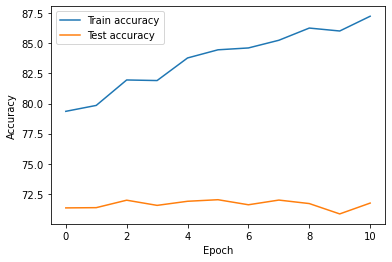

In [ ]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Compute accuracy on train dataset
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc.append(100 * correct / total)

    # Compute accuracy on test dataset
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_acc.append(100 * correct / total)
    
    # Print the current loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc[-1]:.2f}%, Test Accuracy: {test_acc[-1]:.2f}%')


# Plot the train and test accuracy over time
plt.plot(train_acc, label='Train accuracy')
plt.plot(test_acc, label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()






The difference between the train accuracy and test accuracy suggest that the model is overfitting on the train dataset. This indicates that the model is more accurate on the data it has seen during the training process, but not as accurate on new unseen data. To further improve the performance, we can try to use regularization techniques like dropout, weight decay or early stopping.